# Prevendo Resultado de partidas de CS.GO

Importando base de dados e bibliotecas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np  

In [7]:

url='https://drive.google.com/file/d/1HdIGM4fp1K6oNuGNiZqFOoPdzkvs0DbU/view?usp=sharing'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
df = pd.read_csv(url)



In [8]:
df

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,...,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade,round_winner
0,175.00,0.0,0.0,de_dust2,False,500.0,500.0,0.0,0.0,4000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
1,156.03,0.0,0.0,de_dust2,False,500.0,500.0,400.0,300.0,600.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
2,96.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
3,76.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
4,174.97,1.0,0.0,de_dust2,False,500.0,500.0,192.0,0.0,18350.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122405,15.41,11.0,14.0,de_train,True,200.0,242.0,195.0,359.0,100.0,...,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,T
122406,174.93,11.0,15.0,de_train,False,500.0,500.0,95.0,175.0,11500.0,...,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,T
122407,114.93,11.0,15.0,de_train,False,500.0,500.0,495.0,475.0,1200.0,...,4.0,3.0,5.0,1.0,0.0,0.0,5.0,0.0,0.0,T
122408,94.93,11.0,15.0,de_train,False,500.0,500.0,495.0,475.0,1200.0,...,5.0,0.0,3.0,0.0,0.0,0.0,4.0,0.0,0.0,T


# LIDANDO COM DADOS NULOS 
Verifica os valores nulos da base e armazena em um DataFrame

In [60]:
df_nan = pd.DataFrame(df.isna().sum()).reset_index().rename(columns = {0:'total_nan', 'index': 'coluna'})

In [61]:
df_nan =[df_nan.total_nan > 0]

In [62]:
df_nan

[0     False
 1     False
 2     False
 3     False
 4     False
       ...  
 92    False
 93    False
 94    False
 95    False
 96    False
 Name: total_nan, Length: 97, dtype: bool]

# Lidando com variáveis categóricas 

Seleciona as colunas de variáveis categóricas em categ_cols e as não categóricas em cont_cols

In [63]:
cols = df.dtypes.reset_index().rename(columns={'index': 'coluna', 0:'tipo'})
categ_cols = cols[cols.tipo == 'object']
cont_cols = cols[cols.tipo != 'object']
categ_cols

,coluna,tipo
3,map,object
96,round_winner,object


In [64]:
cont_cols.tipo.unique()


array([dtype('float64'), dtype('bool')], dtype=object)

### Tratando variáveis boleanas 
transformando em 0 ou 1

In [65]:
cont_cols[cont_cols.tipo=='bool']

df.bomb_planted = df.bomb_planted.astype(int)

df.bomb_planted

0         0
1         0
2         0
3         0
4         0
         ..
122405    1
122406    0
122407    0
122408    0
122409    0
Name: bomb_planted, Length: 122410, dtype: int32

In [66]:
df.round_winner.unique()

array(['CT', 'T'], dtype=object)

<AxesSubplot:>

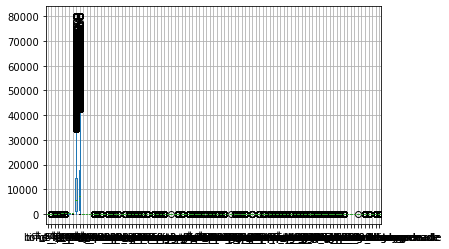

In [55]:
df.boxplot()
# A visualização do boxplot não funcioná devido a grande diferença entre escalas de cada coluna

### Lidando com outliers 


In [87]:
nomes_colunas = []
qtt_outliers = []

for i in cont_cols.coluna:
    
    contador = 0

    q1 = np.quantile(df[i], 0.25)
    q3 = np.quantile(df[i], 0.75)
    li = q1 - 1.5*(q3-q1)
    ls = q3 + 1.5*(q3-q1)

    for j in df.index:
        if li <= df[i][j] <= ls:
            pass 
        else:
            contador += 1
    
    perc_outliers = (contador/df[i].count())*100

    nomes_colunas.append(i)
    qtt_outliers.append(perc_outliers)

   



In [ ]:
 df = df.drop(j, axis = 0)

#### Transformando variaveis categóricas em números com encoder

In [69]:
# porcentagem de outliers por caluna 
outliers = pd.DataFrame()
outliers['coluna'] = nomes_colunas
outliers['perc_outliers'] = qtt_outliers
outliers[outliers.perc_outliers > 10]

,coluna,perc_outliers
3,bomb_planted,11.178825
13,ct_players_alive,12.626419
14,t_players_alive,11.955723
15,ct_weapon_ak47,21.308717
17,ct_weapon_aug,10.071073
23,ct_weapon_cz75auto,12.320072
49,ct_weapon_mp9,10.812025
63,ct_weapon_sg553,18.546687
64,t_weapon_sg553,10.758925
72,t_weapon_deagle,23.721918


In [70]:
## Transformando em número 
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for i in categ_cols.coluna:
    df[str(i) + '_encoded'] = le.fit_transform(df[i])

In [71]:
df = df.drop(['round_winner', 'map'], axis=1)

## Separando treino e teste

In [72]:
from sklearn.model_selection import train_test_split
# deleta resultado da partida no df de treino
x = df.drop('round_winner_encoded', axis = 1)
y = df.round_winner_encoded

In [73]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
#alinhando escalas
x_scaled = scaler.fit_transform(x)


In [74]:
x_scaled = pd.DataFrame(x_scaled, columns= x.columns)

In [75]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y , test_size=0.2, random_state=42)

# Utilizando o modelo de regressão logística 

In [82]:
from sklearn.linear_model import LogisticRegression

modelo = LogisticRegression()

modelo.fit(x_train, y_train)

y_pred = modelo.predict(x_test)

In [77]:
y_pred

array([0, 1, 0, ..., 1, 0, 1])

## Avaliando o Modelo 

In [83]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

print('Acurácia do modelo foi: ' + str(accuracy_score(y_test,y_pred)))
print('O f1 score do modelo foi: ' + str(f1_score(y_test,y_pred)))

cm = confusion_matrix(y_test, y_pred)

Acurácia do modelo foi: 0.7498161914876236
O f1 score do modelo foi: 0.7510263810414212


<AxesSubplot:>

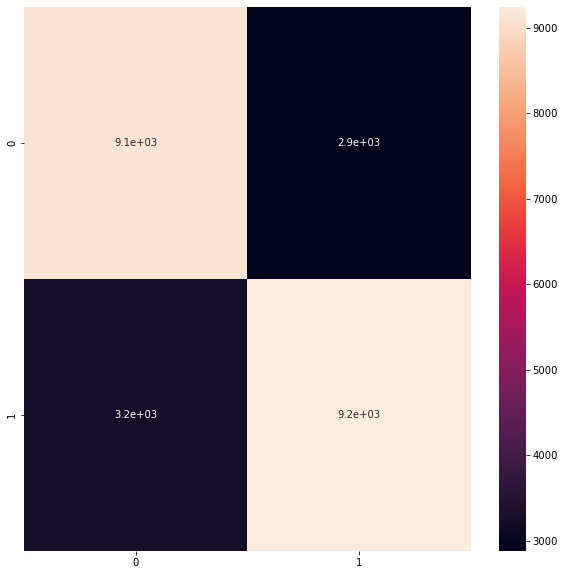

In [84]:
import seaborn as sns

plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True)

In [80]:
x_test.count()

time_left                    24482
ct_score                     24482
t_score                      24482
bomb_planted                 24482
ct_health                    24482
                             ...  
ct_grenade_molotovgrenade    24482
t_grenade_molotovgrenade     24482
ct_grenade_decoygrenade      24482
t_grenade_decoygrenade       24482
map_encoded                  24482
Length: 96, dtype: int64